In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.preprocessing import  LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression

In [43]:
df = pd.read_csv('./Melbourne_housing_FULL.csv', na_values=' ?')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Overview

# making train data

In [44]:
col_train=['Suburb','Rooms','Type','Method','Date','SellerG','Regionname','Propertycount','Distance','CouncilArea','Bathroom' ,'Car','Landsize','BuildingArea','Price']
df_train = df[col_train]
df_train['Date'] = pd.to_datetime(df_train['Date'])

df_train['year'] = [float(x.year) for x in df_train['Date']]
df_train['month'] = [float(x.month) for x in df_train['Date']]
df_train = df_train.drop(['Date'], axis=1)

C:\Users\Admin\AppData\Local\Temp/ipykernel_11840/625914188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Date'] = pd.to_datetime(df_train['Date'])
C:\Users\Admin\AppData\Local\Temp/ipykernel_11840/625914188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['year'] = [float(x.year) for x in df_train['Date']]
C:\Users\Admin\AppData\Local\Temp/ipykernel_11840/625914188.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [45]:
df_train.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
year                 0
month                0
dtype: int64

In [46]:
median_imputer = SimpleImputer(missing_values = np.nan, strategy='median')
df_train['Bathroom'] = median_imputer.fit_transform(df_train[['Bathroom']])
df_train['Car'] = median_imputer.fit_transform(df_train[['Car']])
df_train['Landsize'] = median_imputer.fit_transform(df_train[['Landsize']])
df_train['BuildingArea'] = median_imputer.fit_transform(df_train[['BuildingArea']])
df_train['Price'] = median_imputer.fit_transform(df_train[['Price']])

In [47]:
df_train.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       3
Propertycount    3
Distance         1
CouncilArea      3
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
year             0
month            0
dtype: int64

In [48]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
year             0
month            0
dtype: int64

# Outlier

In [49]:
num_cols = [col for col in df_train.columns if df_train[col].dtypes!='O']
(num_cols)
# df_train.info()

['Rooms',
 'Propertycount',
 'Distance',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'Price',
 'year',
 'month']

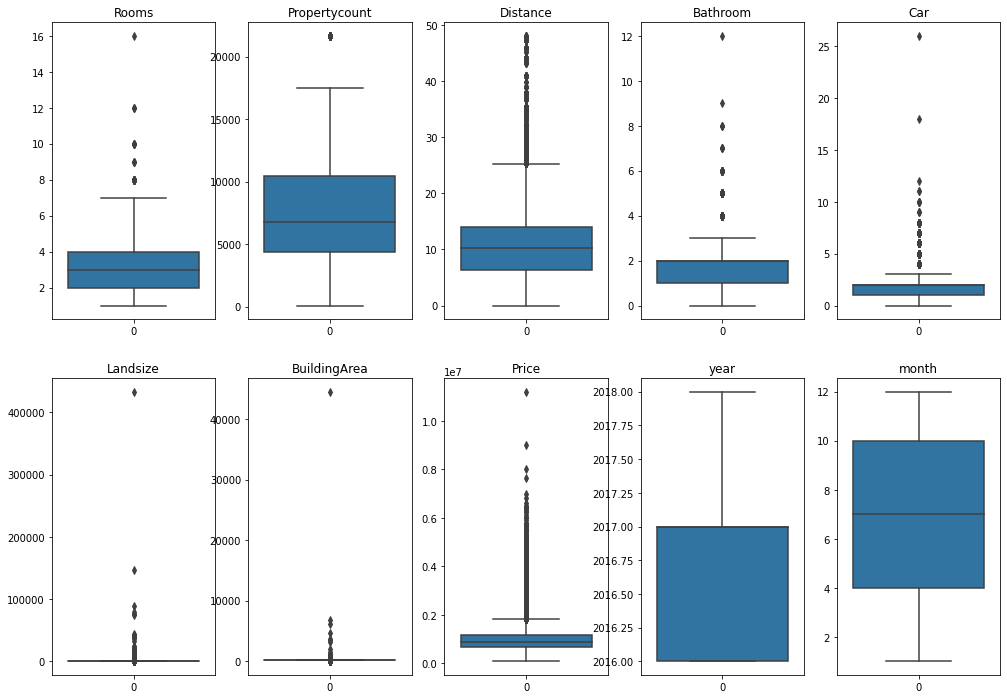

In [50]:
n_rows = 2
n_cols = 5
count = 0

fig, ax =plt.subplots(n_rows, n_cols, figsize=(17, 12))
for i in range(n_rows):
    for j in range(n_cols):
        sns.boxplot(data=df_train[num_cols[count]], ax=ax[i, j])
        ax[i, j].set_title(num_cols[count])
        count += 1
        if (count ==  len(num_cols)):
            break

plt.show()

In [51]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:

    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [52]:
for s in num_cols:
    df_train[s] = BoxplotOutlierClipper().fit_transform(df_train[s])

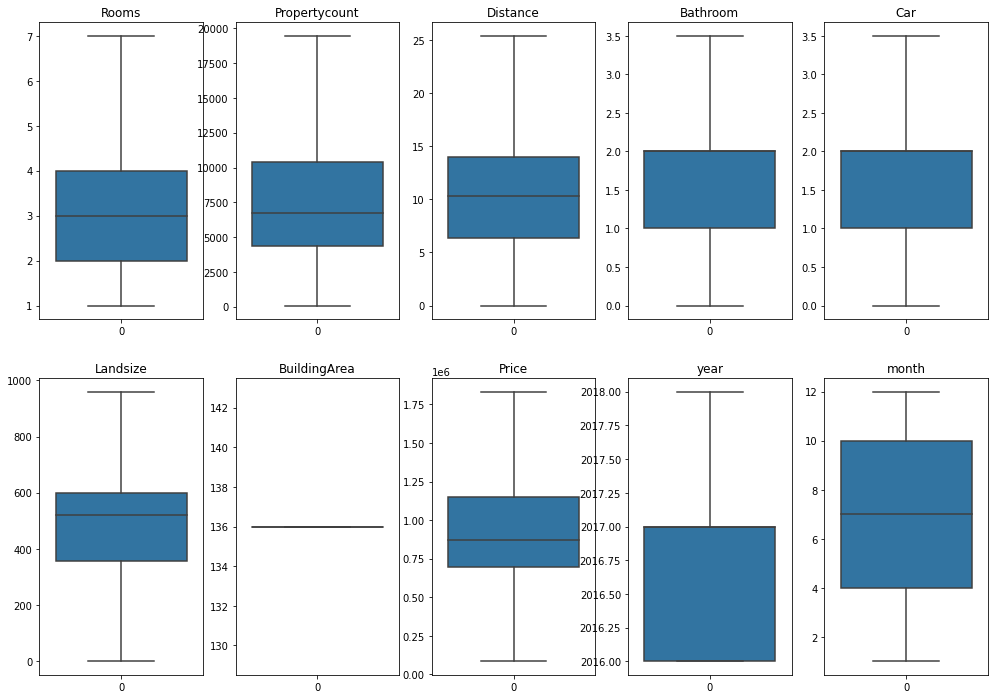

In [53]:
n_rows = 2
n_cols = 5
count = 0

fig, ax =plt.subplots(n_rows, n_cols, figsize=(17, 12))
for i in range(n_rows):
    for j in range(n_cols):
        sns.boxplot(data=df_train[num_cols[count]], ax=ax[i, j])
        ax[i, j].set_title(num_cols[count])
        count += 1
        if (count ==  len(num_cols)):
            break

plt.show()

# Encode Categorical data

In [54]:
pd.DataFrame(df_train.nunique())

,0
Suburb,350
Rooms,7
Type,3
Method,9
SellerG,388
Regionname,8
Propertycount,342
Distance,169
CouncilArea,33
Bathroom,5


In [55]:
cate_cols = [col for col in df_train.columns if df_train[col].dtypes=='O']
(cate_cols)
# df_train.info()

['Suburb', 'Type', 'Method', 'SellerG', 'Regionname', 'CouncilArea']

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#output of fit_transform of Label Encoder is already a Numpy Array
df_train['Suburb'] = le.fit_transform(df_train['Suburb'])
df_train['CouncilArea'] = le.fit_transform(df_train['CouncilArea'])
df_train['SellerG'] = le.fit_transform(df_train['SellerG'])

In [57]:
df_train = pd.get_dummies(df_train, columns=['Type'], prefix='Type')
df_train = pd.get_dummies(df_train, columns=['Method'], prefix='Method')
df_train = pd.get_dummies(df_train, columns=['Regionname'], prefix='Regionname')

In [58]:
df_train

,Suburb,Rooms,SellerG,Propertycount,Distance,CouncilArea,Bathroom,Car,Landsize,BuildingArea,...,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,2.0,155,4019.0,2.5,31,1.0,1.0,126.0,136.0,...,0,0,0,0,1,0,0,0,0,0
1,0,2.0,33,4019.0,2.5,31,1.0,1.0,202.0,136.0,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,33,4019.0,2.5,31,1.0,0.0,156.0,136.0,...,0,0,0,0,1,0,0,0,0,0
3,0,3.0,296,4019.0,2.5,31,2.0,1.0,0.0,136.0,...,1,0,0,0,1,0,0,0,0,0
4,0,3.0,33,4019.0,2.5,31,2.0,0.0,134.0,136.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4.0,152,6543.0,6.3,16,1.0,3.0,593.0,136.0,...,0,0,0,0,0,0,0,0,1,0
34853,347,2.0,321,6543.0,6.3,16,2.0,1.0,98.0,136.0,...,0,0,0,0,0,0,0,0,1,0
34854,347,2.0,152,6543.0,6.3,16,1.0,2.0,220.0,136.0,...,0,0,0,0,0,0,0,0,1,0
34855,347,3.0,370,6543.0,6.3,16,2.0,2.0,521.0,136.0,...,0,0,0,0,0,0,0,0,1,0


# Feature Scaling

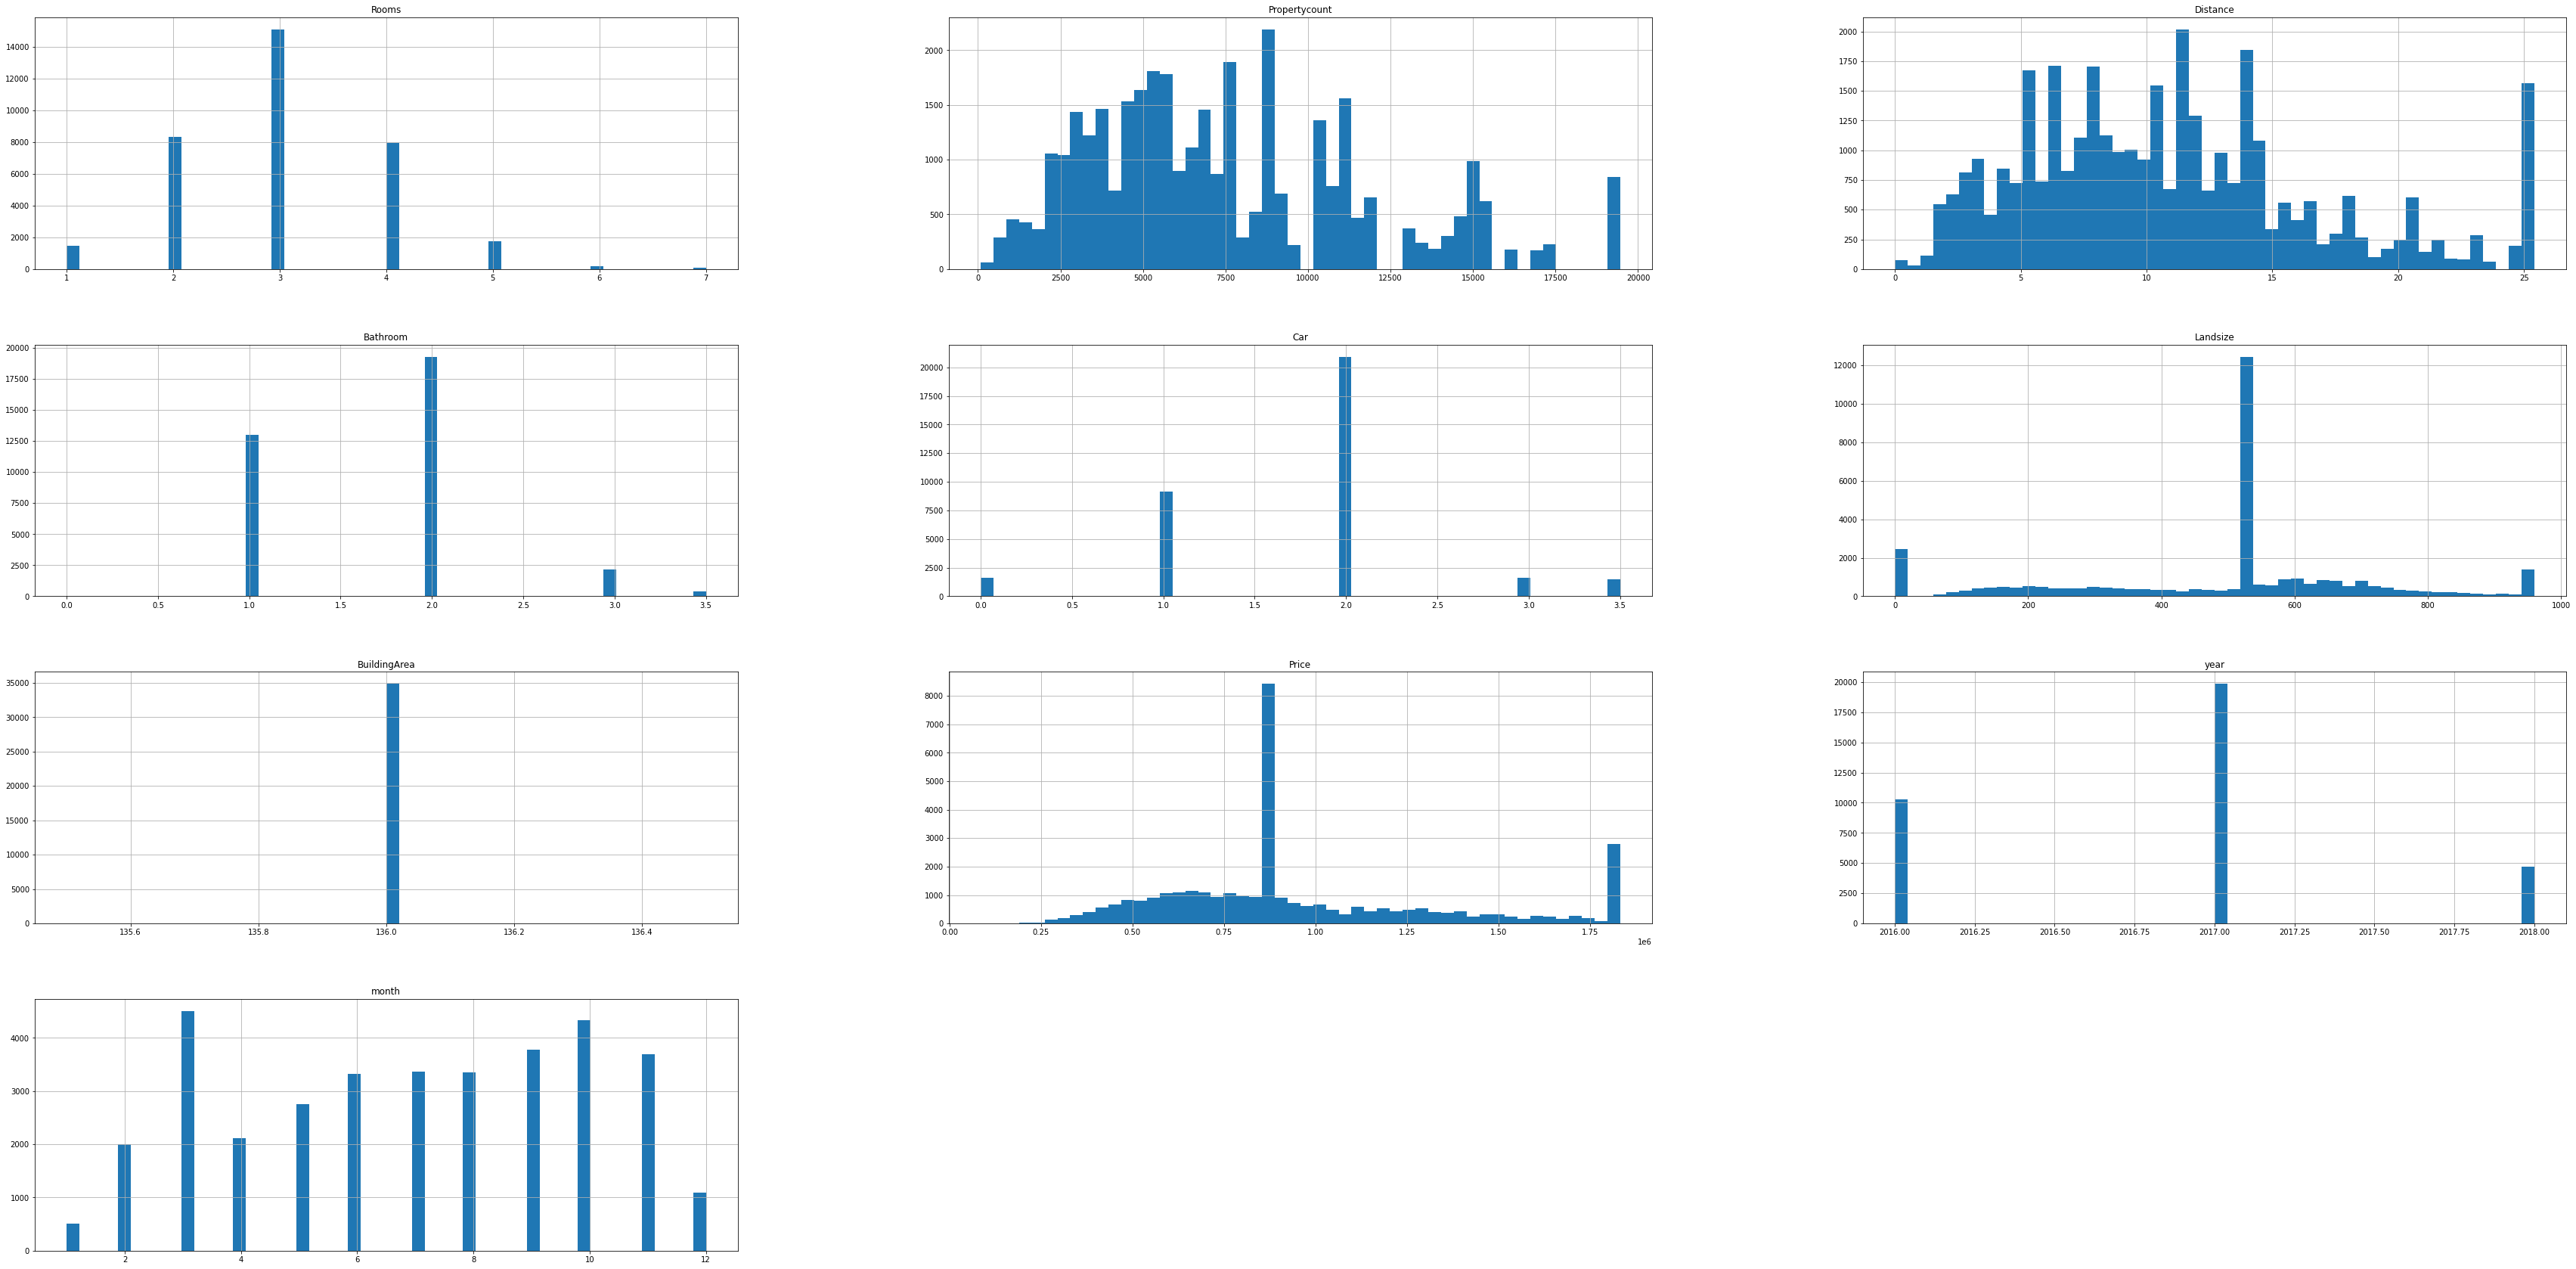

In [59]:
df_train[num_cols].hist(bins=50, figsize=(60,30))
plt.show()

In [60]:
from sklearn.preprocessing import MinMaxScaler

train_x = df_train.drop(['Price'], axis=1)
train_y = df_train['Price']

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

new_train_x = scaler_x.fit_transform(train_x)
new_train_y = scaler_y.fit_transform(np.array(train_y).reshape(-1, 1))

In [61]:
x_train, x_valid, y_train, y_valid = train_test_split(new_train_x, new_train_y, test_size=0.2)

rf_model = LinearRegression()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_valid) 

In [62]:
print('MAE: ', metrics.mean_absolute_error(y_valid, y_pred))
print('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print('R_Square:', metrics.r2_score(y_valid, y_pred))

MAE:  0.12898403439012626
MSE: 0.026405965287369108
RMSE: 0.16249912395877433
R_Square: 0.4828359439172253


In [67]:
print('R_Square:', rf_model.score(x_valid,y_valid))

R_Square: 0.4828359439172253
